# 딥러닝

## 1. 인공지능 역사

### 퍼셉트론(Percepron) 파이썬으로 구현하기

#### AND 게이트

In [ ]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

#### OR 게이트

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

#### NAND 게이트

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

#### MLP(Multi-layer Perceptron)

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

### Neural Network 구현하기
- 자세한 코드 참고하기
 - https://wikibook.co.kr/dl-vision/
 - https://github.com/wikibook/dl-vision 

In [6]:
import numpy as np

class Neuron(object):
    def __init__(self, num_inputs, activation_function):
        super().__init__()

        self.W = np.random.uniform(size=num_inputs, low=-1., high=1.)
        self.b = np.random.uniform(size=1, low=-1., high=1.)
        print(f'self.W : {self.W}')
        print(f'self.b : {self.b}')

        self.activation_function = activation_function

    def forward(self, x):
        z = np.dot(x, self.W) + self.b
        return self.activation_function(z)


np.random.seed(42)      # Fixing the seed for the random number generation, to get reproducable results.
x = np.random.rand(3).reshape(1, 3)   # Random input column array of 3 values (shape = `(1, 3)`)
print(f'x : {x}')

step_function = lambda y: 0 if y <= 0 else 1

perceptron = Neuron(num_inputs=x.size, activation_function=step_function)

out = perceptron.forward(x)
print(f'out : {out}')


x : [[0.37454012 0.95071431 0.73199394]]
self.W : [ 0.19731697 -0.68796272 -0.68801096]
self.b : [-0.88383278]
out : 0


-------

## 2.CNN(Convolution Neural Networks)

### Convolution : 합성곱 연산 

In [ ]:
import numpy as np

# input array
m = np.array([[1,2,2,0],[0,1,2,3],[1,0,1,2],[2,3,0,1]])
# convolution kernel(==filter,mask)
f = np.array([[0,0,0],[0,1,0],[0,0,0]])
# output
result = []
mx, my = np.shape(m)
fx, fy = np.shape(f)
print(f'mx, my : {mx, my}')
print(f'fx, fy : {fx, fy}')

for i in range(mx-fx+1):
    for j in range(my-fy+1):
        result.append((m[i:i+fy, j:j+fy] * f).sum())
        
result=np.array(result).reshape(2,2)        
print(result)

### OpenCV를 이용한 Convolution 예제

#### OpenCV 라이브러리 설치하기

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
cv2.__version__

#### Bluring : 영상을 부드럽게

In [ ]:
import sys
import numpy as np
import cv2

src = cv2.imread('opencv/images/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 부드럽게
# mask = np.array([[1/9,1/9,1/9],
#                 [1/9,1/9,1/9],
#                 [1/9,1/9,1/9]])
# mask = np.ones((3,3), dtype=np.float64)/ 9.

# 날카롭게
mask = np.array([[0,-1,0],
                [-1,5,-1],
                [0,-1,0]])
dst = cv2.filter2D(src, -1, mask)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

#### Noise cancling잡음제거

In [ ]:
src = cv2.imread('opencv/images/lenna_noise.bmp', cv2.IMREAD_GRAYSCALE)

cv2.imshow('src', src)
for i in range(3, 8, 2):
    dst = cv2.medianBlur(src, i)
    cv2.imshow(f'dst{i}', dst)
cv2.waitKey()
cv2.destroyAllWindows()

#### 에지 검출

In [ ]:
src = cv2.imread('opencv/images/lenna.bmp', cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(src, -1, 1, 0, delta=128)
dy = cv2.Sobel(src, -1, 0, 1, delta=128)
cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# Canny 에지 검출
src = cv2.imread('opencv/images/lenna.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.Canny(src, 50, 150)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### [실습] 실시간 카툰 필터 만들기

In [1]:
import sys
import cv2

def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)
    return dst


def pencil_sketch_filter(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale=255)
    return dst

# 실시간 카메라 작동
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

cam_mode = 0    
while True:
    ret, frame = cap.read()
    if not ret:
        print('Video read failed!')
        break
    
    # 모드에 따라 필터 적용한 영상(frame) 보여주기
    if cam_mode == 1:
        frame = cartoon_filter(frame)
        title = 'cartoon_filter'
    elif cam_mode ==2:
        frame = pencil_sketch_filter(frame)
        title = 'pencil_sketch_filter'
    else:
        title = ''
        
    cv2.putText(frame, title, (30, 30),
            cv2.FONT_HERSHEY_DUPLEX, 1, 
             (255,0,255), 2, cv2.LINE_AA)
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(1)
    if key==27: # ESC키 눌러졌을 때
        break
    elif key==ord(' '): #스페이스키 눌러졌을 때
        cam_mode += 1
        if cam_mode==3:
            cam_mode = 0
    
cap.release()
cv2.destroyAllWindows()
print('Video Finish!')

Video Finish!


--------

## 3.Tensorflow

### Tensorflow 설치하기

In [ ]:
!pip install tensorflow==2.3

In [9]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           0.13.0
Adafruit-Blinka                   6.15.0
adafruit-circuitpython-busdevice  5.1.1
adafruit-circuitpython-motor      3.3.1
adafruit-circuitpython-pca9685    3.3.9
adafruit-circuitpython-register   1.9.6
adafruit-circuitpython-servokit   1.3.6
Adafruit-PlatformDetect           3.17.2
Adafruit-PureIO                   1.1.9
anytree                           2.8.0
argon2-cffi                       20.1.0
astroid                           2.4.2
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
backcall                          0.2.0
beautifulsoup4                    4.10.0
bleach                            3.3.0
branca                            0.4.2
cachetools                        4.2.2
certifi                           2021.5.30
cffi                              1.14.5
chardet       

### Tensorflow 사용하기

In [7]:
import tensorflow as tf

tf.__version__

'2.3.0'

### Tensorflow에서 Keras를 사용하는 방법

In [ ]:
# 방법1:
import tensorflow as tf

model = tf.keras.models.Sequential()


# 방법2
from tensorflow.keras.models import Sequential

model = Sequential()

### [실습] Tensorflow & keras를 이용하여 Multi-layered NN 구현하기

#### 신경망 모델 훈련 과정
- 1. 학습 데이터 준비: (MNIST) 
https://www.tensorflow.org/api_docs/python/tf/keras/datasets 

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


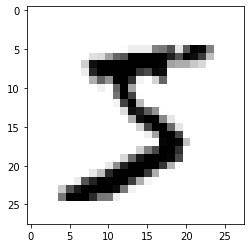

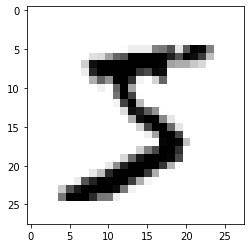

In [20]:
# 1.학습 데이터 준비
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# MNIST 데이터 로딩하기
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
# print(x_train[0])
print(x_train[0].shape)

# MNIST 데이터 plotting
import matplotlib.pyplot as plt
# plt.imshow(x_train[0])
plt.imshow(x_train[0],cmap='gray_r')
plt.show()

# MNIST 데이터 Flattening
x_train, x_test = x_train/255.0, x_test/255.0

import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray_r')
plt.show()


In [21]:
28*28

784

- 2.신경망 모델 정의: tf.keras.models.Sequential()
Flatten(28x28=784을 1차원 배열로 변환)

In [24]:
# 2.신경망 모델 정의
# 방법1
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 방법2
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


- 3.컴파일 과정 설정: optimizer='adam', loss=crossentry

In [25]:
# 3.컴파일 과정 설정
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

- 4.모델 훈련

In [29]:
# 4.모델 훈련
model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - accuracy: 0.9905
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0261 - accuracy: 0.9905
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9925


- 5.예측 및 평가

In [32]:
# 5.예측 및 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Testing Accuracy: {round(accuracy*100,2)}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9788
Testing Accuracy: 97.88%


- 그래프(loss/accuracy) 그려보기

In [37]:
loss, accuracy = [], []
trycnt = list(range(10))
for i in trycnt:
    model.fit(x_train, y_train, epochs=1, verbose=1)
    loss.append(model.evaluate(x_test, y_test)[0])
    accuracy.append(model.evaluate(x_test, y_test)[1])

print(loss)   
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9791
[0.0998644232749939, 0.10260885953903198, 0.10331844538450241, 0.10092845559120178, 0.10074387490749359, 0.10490000993013382, 0.11044973134994507, 0.10773804038763046, 0.10801603645086288, 0.11102629452943802]
[0.9789999723434448, 0.9801999926567078, 0.9793999791145325, 0.9796000123023987, 0.9789999723434448, 0.9787999987602234, 0.9797999858856201, 0.9800000190734863, 0.9790999889373779, 0.9790999889373779]


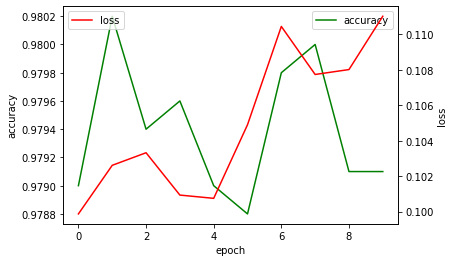

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(trycnt, accuracy, label='accuracy', c='green')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(trycnt, loss, label='loss', c='red')
ax2.set_ylabel('loss')
ax2.legend()
plt.show()

In [41]:
# 학습된 모델의 요약 정보
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.trainable

True

In [43]:
# 학습된 파라미터 정보
model.weights  

[<tf.Variable 'dense_5/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.03238641, -0.03992572,  0.04991055, ...,  0.05916967,
          0.02377454, -0.07064185],
        [ 0.04979076,  0.06923404, -0.0661085 , ...,  0.00892364,
         -0.05464988, -0.04078314],
        [-0.06119046,  0.00315742, -0.05007455, ..., -0.0439156 ,
         -0.01731028, -0.0452692 ],
        ...,
        [ 0.05248772, -0.01163725, -0.08074009, ..., -0.02977708,
          0.01914117, -0.06827375],
        [ 0.03928537, -0.07925914,  0.07872538, ...,  0.02741506,
          0.01131457,  0.00378472],
        [ 0.02111915,  0.04443479,  0.0583845 , ..., -0.01141449,
         -0.00309628, -0.06168904]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.04577921, -0.34710237, -0.29664075, -0.3622076 , -0.43294182,
         0.08783269, -0.06770349, -0.20994657, -0.31473175, -0.13244952,
        -0.25292352,  0.17775345, -0.0836177 , -0.12104016, -0.13361716,
